### 함수
- 반복되는 코드를 묶음으로 효율적인 코드를 작성하도록 해주는 기능
- 기본 함수
- 파라미터와 아규먼트
- 리턴
- `*args`, `**kwargs`
- docstring
- scope
- inner function
- lambda function
- Map, Filter, Reduce
- Decorlator

### 1. 기본 함수
    - 선언과 호출

In [1]:
point = 88

if point >= 90:
    print('A')
elif point >= 80:
    print('B')
else:
    print('C')

B


In [ ]:
# code ... 같은 코드가 또 필요하다면?

In [3]:
point = 78

if point >= 90:
    print('A')
elif point >= 80:
    print('B')
else:
    print('C')

C


이렇게 동일한 코드가 반복되는 경우 함수로 선언해 중복을 줄이고 재서용성과 유지보수 효율을 높인다.

In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [9]:
%whos

Variable          Type                          Data/Info
---------------------------------------------------------
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
get_ipython       function                      <function get_ipython at 0x0000016F19286AF8>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
np                module                        <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
var_dic_list      function                      <function var_dic_list at 0x0000016F5F7E30D8>


In [13]:
# 함수 선언

def get_grade(point):
    if point >= 90:
        print('A')
    elif point >= 80:
        print('B')
    else:
        print('C')

In [11]:
%whos

# get_grade    function   <function get_grade at 0x0000016F5F7E3AF8>

Variable          Type                          Data/Info
---------------------------------------------------------
NamespaceMagics   MetaHasTraits                 <class 'IPython.core.magi<...>mespace.NamespaceMagics'>
get_grade         function                      <function get_grade at 0x0000016F5F7E3AF8>
get_ipython       function                      <function get_ipython at 0x0000016F19286AF8>
getsizeof         builtin_function_or_method    <built-in function getsizeof>
json              module                        <module 'json' from 'C:\\<...>\lib\\json\\__init__.py'>
np                module                        <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
var_dic_list      function                      <function var_dic_list at 0x0000016F5F7E30D8>


In [7]:
# 함수 호출
get_grade(90)
get_grade(80)
get_grade(70)

A
B
C


함수도 하나의 데이터 타입이라고 할 수 있다. 다만 값이 아닌 코드를 가지고 있어 함수 호출로 인해 함수가 가진 코드가 실행된다.

### 2. 파라미터와 아규먼트
- 파라미터 : 함수를 선언할 때 호출하는 부분에서 보내주는 데이터를 받는 변수
- 아규먼트 : 함수를 호출할 때 함수에 보내주는 데이터

In [12]:
def plus(num1, num2): # 파라미터 -> num1, num2
    print(num1 + num2)
    
plus(1, 2) # 아규먼트로 파라미터에 값을 전달

3


In [16]:
# 디폴트 파라미터
# 인자값을 넘기지 않은 경우 디폴트 값을 파라미터에 적용할 수 있다.
def plus(num1, num2 = 10):
    print(num1 + num2)
    
plus(2)
plus(1, 5)

12
6


In [22]:
# 키워드 아규먼트
# 특정 파라미터의 디폴트 값만을 변경하고 싶은 경우
# 키워드 아규먼트로 특정 파라미터 값을 지정할 수 있다.
def plus(num1, num2 = 10, num3 = -20):
    print(num1 + num2 + num3)

plus(10, num3 = 100)

120


### 3. 리턴
- 함수를 실행한 결과를 저장하고 싶을 때 사용
- return

In [7]:
def plus(num1, num2):
    print(num1 + num2)
    return num1 + num2
    
plus(1, 2)

3


3

In [9]:
# 예를 들어 upper() 함수의 경우 return이 있다고 할 수 있다.

data1 = 'python'
result = data1.upper()
print(result)

PYTHON


In [10]:
# 예를 들어 sort() 함수는 return이 없다고 할 수 있다.

data2 = [3, 1, 2]
result = data2.sort()
print(result)

None


---

In [15]:
point = 88
result = get_grade(point)
print(result)

B
None


In [16]:
if result == 'A':
    print('pass')
else:
    print('fail')

fail


In [22]:
# return을 이용해 앞의 get_grade 함수를 다시 작성해보자

# 함수 선언

def get_grade(point):
    if point >= 90:
        result = 'A'
    elif point >= 80:
        result = 'B'
    else:
        result = 'C'
    return result

point = 92

result = get_grade(point)

if result == 'A':
    print('pass')
else:
    print('fail')

pass


In [25]:
# return의 또 다른 특징으로 return은 함수를 중단시키기 위해서도 사용할 수 있다.

def echo(msg):
    if msg == 'quit':
        return
    print(msg)
    
echo('python')
echo('quit') # print되지 않는다.

python


### 4. `*args`, `**kwargs`
   - 함수를 호출할 때 아규먼트와 키워드 아규먼트의 갯수를 특정지을 수 없을 때 사용

In [26]:
# 기존의 함수 작성 방식

def plus(num1, num2):
    return num1 + num2

plus(1, 2)

3

In [27]:
# 그런데 plus() 함수에 몇개의 인자값이 들어올지 모른다면??

def plus(*args):
    print(type(args), args)
    return sum(args)

plus(1, 2, 3, 4, 5 ,6 ,7 ,8 ,9)

<class 'tuple'> (1, 2, 3, 4, 5, 6, 7, 8, 9)


45

`*args` 를 이용하면 변수의 타입이 튜플로 지정되며 갯수를 특정지을 수 없는 경우에서도 여러개의 인자값을 담을 수 있게 된다.

In [32]:
# 키워드가 있는 아규먼트가 필요하다면?

def plus(*args, **kwargs):
    print(type(args), args)
    print(type(kwargs), kwargs)
    return sum(args), sum(list(kwargs.values()))

plus(1, 2, 3, 4, 5, num1=6, num2=7)

<class 'tuple'> (1, 2, 3, 4, 5)
<class 'dict'> {'num1': 6, 'num2': 7}


(15, 13)

`**kwargs`를 이용하면 데이터 타입이 dictionary로 지정되며 갯수를 특정지을 수 없는 경우에서도 여러개의 키워드 아규먼트를 사용할 수 있다.

---

In [34]:
def func(num1, num2, num3):
    return num1 + num2 + num3

data = [1, 2, 3]

func(*data) # *가 붙음, func(1, 2, 3)과 동일한 의미

6

*를 이용해 인자값으로 넘어오는 리스트에 속하는 각각의 원자값이 파라미터에 전달된다.

In [38]:
# 딕셔너리의 value를 인자값으로 넘기는 경우 **

data = {
    'num2' : 100,
    'num3' : 200,
}
func(1, **data) # func(1, num2=100, num3=200)와 동일하다.

301

In [76]:
# 연습문제1

# 문장을 입력받아서 문법에 맞도록 결과를 출력하는 코드를 작성
# python IS the best language.
# Python is the best language.
# 마지막 문자는 점이 있을 수도 있고 없을 수도 있다.
# 로 결과가 나오도록 코드륵 작성

sentence = 'python Is the best language'

def preprocess_sentence(sentence):
    sentence_list = list(sentence)
    result = ''
    for i in sentence_list:
        if sentence_list.index(i) == 0:
            result += i.upper()
        else:
            result += i.lower()
            
    if sentence_list[-1] == '.':
        return result
    else:
        result += '.'
        
    return result

preprocess_sentence(sentence)

'Python is the best language.'

In [78]:
# 문제 풀이

# 1. 문자열 입력 받기
sentence = 'python Is the best language'

# 2. 모두 소문자로 변경
result = sentence.lower()

# 3. 가장 앞글자를 대문자로 변경
result = result[0].upper() + result[1:]

# 4. 마지막 문자가 .인지 확인, .이 아니면 . 를 추가
if result[-1] != '.':
    result += '.'
    
result

'Python is the best language.'

In [94]:
# 문제 2 

# 6자리 로또 번호를 생성하는 코드를 작성
# 6자리 번호는 중복이 X

import random

# 난수를 담을 리스트 생성
nums = []

# 중복되는 값이 리스트에 담기지 않도록 무한반복 로직 이용
while True:
    # 1~45 사이의 값을 갖는 난수 발생
    num = random.randint(1, 45)
    # num과 같은 값을 갖는 nums의 원소가 없다면 nums에 추가
    if num not in nums:
        nums.append(num)
    else:
        continue
    # 무한루프이기 때문에 nums에 6개 원소가 채워지면 반복문 강제종료
    if len(nums) == 6:
        nums.sort()
        print(nums)
        break


[10, 13, 27, 29, 30, 45]


In [ ]:
# docstring 확인방법 shift tab
print

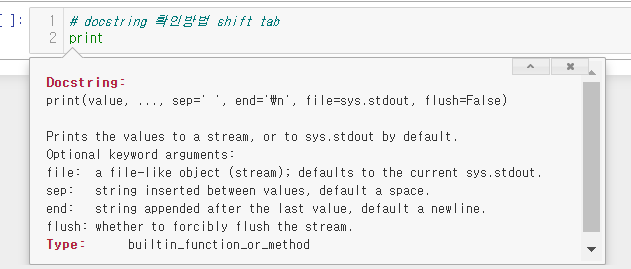

In [ ]:
# 또 다른 방법

In [95]:
echo?

In [96]:
echo??

In [97]:
help(echo)

Help on function echo in module __main__:

echo(msg)



In [101]:
print(print.__doc__)

print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.


### 2. Scope 범위
- 함수 안에서 선언되는 변수와 함수 밖에서 선언되는 변수의 범위가 다르다.
- global(전역), local(지역)

In [103]:
# global

gv = 10

def echo():
    print(gv)
    
echo()

10


In [107]:
# local

gv = 10

def echo():
    gv = 100
    print(gv)
    
echo()

100


In [105]:
gv

10

똑같은 이름의 변수여도 전역이냐 지역이냐에 따라 출력되는 값이 다르다.

함수 내부에 있는 gv 변수는 함수 안에서만 활동이 되고 함수 밖에서 정의된 gv는 함수 안에서도 사용 가능하다.

함수 내부에 정의된 변수가 없을 경우 함수 외부의 전역 변수를 사용하고 함수 내부에 정의된 변수가 있을 경우 지역 변수를 사용한다.

In [110]:
gv = 10

def echo():
    global gv # 명시적 전역변수 지정
    gv = 100
    print(gv)
    
echo()

100


### 4. inner function
- 함수가 지역영역에 선언(함수가 함수 안에 선언)

In [113]:
def outer(a, b):
    
    def inner(c, d):
        return c + d
    
    return inner(a, b)

In [114]:
outer(1, 2) # 전역함수를 통해 지역 함수를 사용

3

In [115]:
inner(1, 2) # 지역영역에 선언된 변수 사용 불가

NameError: name 'inner' is not defined

In [117]:
# 전역영역에서 지역영역 함수를 호출하는 방법

def outer(a, b):
    
    def inner(c, d):
        return c + d
    
    return inner

outer(1, 2)(3, 4)

7

위의 경우 outer(1, 2)를 통해 outer함수를 호출하는데 이 때 반환 값이 inner 함수이다.
따라서 결과적으로 inner(3, 4)와 동일하며 결과 값으로 7이 반환된다.

즉, outer(1, 2)에서 전달된 인자값은 사실상 의미가 없는 인자값이다.

In [121]:
def inner(c, d):
    return c + d

def outer(a, b):
    return inner

outer(1, 2)(3, 4)

# outer의 반환값은 inner인데 이 때 지역영역의 inner 함수는 존재하지 않아 전역영역의 inner함수를 찾게된다.
# 따라서 전역영역의 inner 함수가 호출된 것이다.

7

In [123]:
# callback function : 함수를 아규먼트 파라미터로 설정해서 사용

In [128]:
# callback function을 이용한 계산기 예제

def calc(func, a, b):
    return func(a, b)

def plus(a, b):
    return a + b

def minus(a, b):
    return a - b

In [129]:
calc(plus, 1, 2)

3

In [130]:
calc(minus, 1, 2)

-1

즉, 인자값으로 함수를 넘겨 인자값에 특정 함수를 적용(호출)시키는 것!

### 4. 람다함수
    - 파라미터를 간단한 계산으로 리턶나는 함수 : 삼항 연산

In [132]:
def plus(a, b):
    return a + b

plus(1, 2)

3

In [136]:
plus2 = lambda a, b : a + b # lambda 파라미터 : 리턴값
plus2(2, 3)

5

lambda 함수를 왜 쓰는가?

In [138]:
# 위에서 생성한 calc 함수에 lambda를 적용시킬 수 있다.

calc(lambda a, b: a * b, 3, 4)

12

또한 일반적인 함수를 선언하면 저장공간을 사용하게 되는데 lambda의 경우 호출되면서 생성되기 때문에 저장공간을 적게 쓰고 컴퓨터 자원을 더 효율적으로 사용할 수 있기 때문에 사용한다.

In [142]:
a = (lambda a, b: a + b, 3, 4)

(<function __main__.<lambda>(a, b)>, 3, 4)

### 5. map, filter, reduce

- map : 순서가 있는 데이터 집합에서 모든 값에 함수를 적용시킨 결과를 출력

In [160]:
ls = [1, 2, 3, 4]

def odd_even(num):
    return 'odd' if num % 2 else 'even'

list(map(odd_even, ls))

['odd', 'even', 'odd', 'even']

In [162]:
# input 함수로 구분자는 ' '으로 여러개의 숫자를 입력 받습니다.
# str.split(' ')함수로 리스트를 생성하고
# 만들어진 리스트의 값들을 정수로 형변환

datas = input('insert numbers (separator = " ")')

insert numbers (separator = " ")10 20 30 40 50


In [182]:
result = datas.split(' ')
result

['10', '20', '30', '40', '50']

In [183]:
result = map(int, result)
list(result)

[10, 20, 30, 40, 50]

#### filter
- 리스트 데이터에서 특정 조건에 맞는(True) value만 남기는 함수

In [189]:
ls = range(10)

# 홀수만 출력
list(filter(lambda x:True if x % 2 else False, ls))

[1, 3, 5, 7, 9]

#### reduce
- 리스트 데이터를 처음부터 순서대로 특정 함수를 실행하여 결과를 누적시켜 주는 함수

In [190]:
from functools import reduce

In [194]:
ls = [3, 1, 2, 4, 5]

reduce(lambda x, y: x+y, ls) # 계산을 누적하기 때문에 파라미터 두개가 필요

15

### 6. Decorlator
- 함수에서 코드를 바꾸지 않고 기능을 추가하거나 수정하고 싶을 때 사용하는 문법

```
def a():
    code_1
    code_2
    code_3
```
```
def b():
    code_1
    code_4
    code_3
```

위처럼 중복되는 code가 존재한다면 a라는 함수에는 code_2만 사용하고 b라는 함수는 code_4만 써서 code_1과 code_3을 묶어주면 관리 효율성이 증가할 수 있다.



- 데코레이터의 사용

```
def c(func):
    def wrapper(*args, **kwargs):
        code_1
        result = func(*args, **kwargs)
        code_3
        return result
    return wrapper

@c
def a():
    code_2

@c
def b():
    code_4
```

@는 데코레이터를 사용하기 위한 문법이다.

위 경우 @c를 통해 함수 c가 실행되며 c함수의 파라미터 func에는 함수 a가 들어가게 된다. 그리고 함수 c 내부에 작성된 inner function인 wrapper 함수가 생성되며 이 때 인자값으로 넘어온 함수 a가 result에 저장된다. 

따라서 return wrapper를 통해 code_1, code_2, code_3을 사용할 수 있게 된다.

In [204]:
# a
def plus(a, b):
    print('start')                       # code_1
    result = a + b                      # code_2
    print('result : {}'.format(result)) # code_3
    return result

In [205]:
# b
def minus(a, b):
    print('start')                       # code_1
    result = a - b                      # code_4
    print('result : {}'.format(result)) # code_3
    return result

In [211]:
# c , 데코레이터 function
def disp(func):
    def wrapper(*args, **kwargs):
            print('start')                         # code_1
            result = func(*args, **kwargs)        # code_2, code_4
            print('result : {}'.format(result))  # code_3
            return result
    return wrapper
    
    

In [215]:
# 함수 a, b에 데코레이터 함수 c를 적용!

@disp
def plus(a, b):

    result = a + b                      # code_2

    return result

plus(1, 3)

start
result : 4


4

In [217]:
# 함수 a, b에 데코레이터 함수 c를 적용!

@disp
def minus(a, b):

    result = a - b                      # code_2

    return result

minus(10, 7)

start
result : 3


3

In [ ]:
# 함수의 실행 시간을 출력하는 데코레이 함수 작성

In [219]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print('running time : {}'.format(end_time - start_time))
        return result
    return wrapper

In [221]:
def test1(num1, num2):
    data = range(num1, num2+1)
    return sum(data)

def test2(num1,  num2):
    result = 0
    for num in range(num1, num2+1):
        result += num
    return result

In [224]:
test1(1, 100000)

5000050000

In [225]:
test2(1, 100000)

5000050000

In [228]:
@timer
def test1(num1, num2):
    data = range(num1, num2+1)
    return sum(data)
test1(1, 100000)

running time : 0.0019941329956054688


In [230]:
@timer
def test2(num1,  num2):
    result = 0
    for num in range(num1, num2+1):
        result += num
    return result
test2(1, 100000)

running time : 0.003989458084106445


이처럼 데코레이터 함수는 만들어두면 어떤 함수던 계속해서 사용할 수 있다.

In [231]:
# 패스워드를 입력 받아야 함수가 실행되도록 하는 데코레이터 작성

In [247]:
# 데코레이터 Function

def check_password(func):
    def wrapper(*args, **kwargs):
        pw = '1234'
        # check password
        input_pw = input('insert pw : ')
        if input_pw == pw:
            result = func(*args, **kwargs)
        else:
            result = "not allow!"
        return result
    return wrapper

In [248]:
@check_password
def plus(a, b):
    return a + b

plus(5, 10)

insert pw : 


'not allow!'

In [249]:
@check_password
def lotto_func():
    lotto = []
    while True:
        number = random.randint(1, 45)
        if number not in lotto:
            lotto.append(number)
        if len(lotto) >= 6:
            lotto.sort()
            break
    return lotto

lotto_func()

insert pw : 


'not allow!'

In [273]:
# 데코레이터 Function
# 응용예제, ID, PW 확인

def check_password_2(func):
    def wrapper(*args, **kwargs):
        print('Hello Welcome to PYLOTTO!')
        datas = [
            {'id':'kimdingko'},
            {'pw':'1234'}
        ]
        # check password
        input_id = input('insert id : ')
        input_pw = input('insert pw : ')
        
        if input_id == datas[0]['id'] and input_pw == datas[1]['pw']:
            result = func(*args, **kwargs)
        else:
            result = 'not allow!'
        return result
    return wrapper



In [274]:
@check_password_2
def lotto_func():
    lotto = []
    while True:
        number = random.randint(1, 45)
        if number not in lotto:
            lotto.append(number)
        if len(lotto) >= 6:
            lotto.sort()
            break
    return lotto

lotto_func()

Hello Welcome to PYLOTTO!
insert id : kimdingko
insert pw : 1234


[4, 13, 33, 35, 42, 44]